In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('auto2.csv')

In [3]:
data.describe()

,year,SellingPrice,kmdriven
count,4344.000000,4.342000e+03,4343.000000
mean,2013.092311,5.039987e+05,66193.063320
std,4.214543,5.784465e+05,46636.648764
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   SellingPrice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_Type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


### Предобработка данных:
 - Удаление Nan
 - Удаление явных и неявных дубликатов

In [5]:
print(data.isnull().sum())

Name            0
year            0
SellingPrice    2
kmdriven        1
fuel            1
seller_Type     0
transmission    0
owner           0
dtype: int64


In [6]:
data.dropna(subset=['SellingPrice', 'kmdriven', 'fuel'], inplace=True)
print(data.isnull().sum())

Name            0
year            0
SellingPrice    0
kmdriven        0
fuel            0
seller_Type     0
transmission    0
owner           0
dtype: int64


In [7]:
print("Количество повторяющихся строк:", data.duplicated().sum())

data.drop_duplicates(inplace=True)
print("Количество строк после удаления дубликатов:", len(data))

categorical_cols = data.select_dtypes(include='object').columns
print("Уникальные значения в категориальных столбцах (проверьте на наличие неявных дубликатов):")
for col in ['fuel', 'seller_Type', 'transmission', 'owner']:
    print(f"'{col}':")
    print(data[col].unique())

data['fuel'] = data['fuel'].replace('Petroll', 'Petrol')
data['seller_Type'] = data['seller_Type'].replace('Dealeer', 'Dealer')

Количество повторяющихся строк: 763
Количество строк после удаления дубликатов: 3579
Уникальные значения в категориальных столбцах (проверьте на наличие неявных дубликатов):
'fuel':
['Petrol' 'Diesel' 'Petroll' 'CNG' 'LPG' 'Electric']
'seller_Type':
['Individual' 'Dealer' 'Dealeer' 'Trustmark Dealer']
'transmission':
['Manual' 'Automatic']
'owner':
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


### Выполнение основного анализа

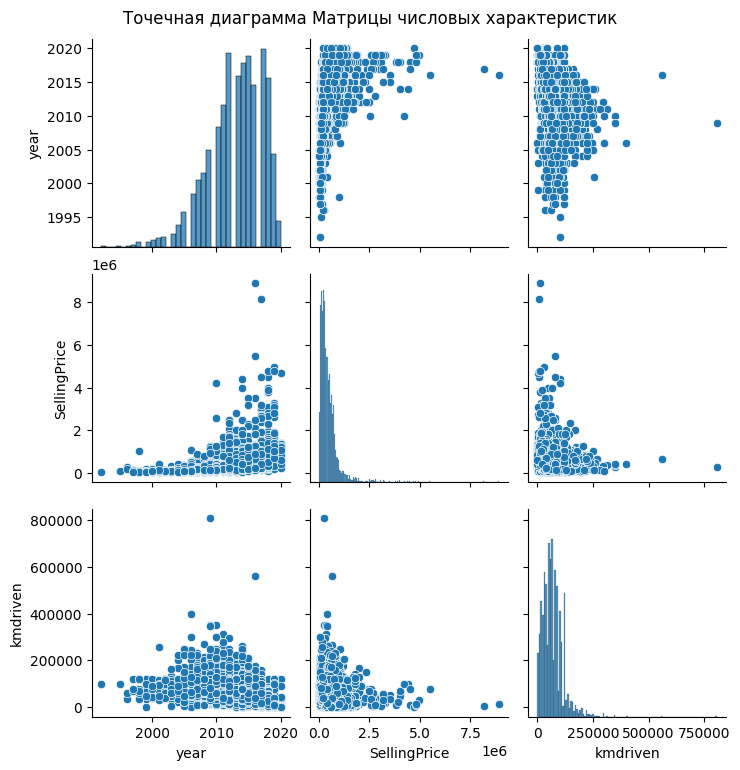

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(data[numerical_features])
plt.suptitle('Точечная диаграмма Матрицы числовых характеристик', y=1.02)
plt.show()

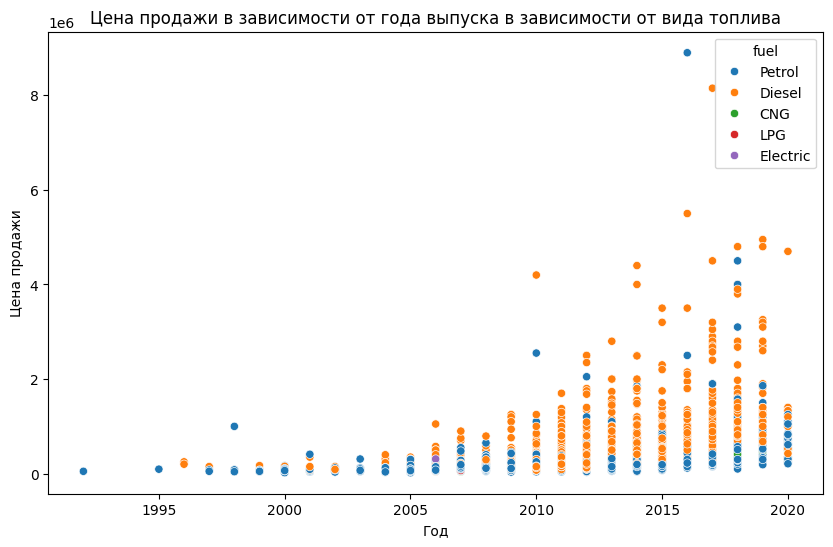

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='year', y='SellingPrice', hue='fuel')
plt.title('Цена продажи в зависимости от года выпуска в зависимости от вида топлива')
plt.xlabel('Год')
plt.ylabel('Цена продажи')
plt.show()

Матрица диаграмм рассеяния:
Матрица диаграмм рассеяния показывает парные зависимости между числовыми признаками: 'year', 'SellingPrice' и 'kmdriven'.

- SellingPrice и Year: Наблюдается общая зависимость увеличения SellingPrice с увеличением year. Новые авто обычно стоят дороже.
- SellingPrice и kmdriven: Существует отрицательная корреляция между SellingPrice и kmdriven. По мере увеличения kmdriven SellingPrice имеет тенденцию к снижению. Тк автомобили с большим пробегом, как правило, менее ценны.
- Year и kmdriven: Не наблюдается сильной линейной зависимости между year и kmdriven.

Selling Price и Year по типу топлива:
Эта диаграмма рассеяния показывает зависимсоть между SellingPrice и year, при этом различные типы топлива (fuel) представлены разными цветами.

- Диаграмма показывает, что автомобили всех типов топлива, как правило, следуют тенденции увеличения SellingPrice с увеличением year.
- Дизельные автомобили, как правило, имеют более высокие цены продажи по сравнению с бензиновыми и газовыми автомобилями, особенно среди более новых моделей. Это может быть связано с различными факторами, включая первоначальную стоимость автомобиля и рыночный спрос.
- Для газовых автомобилей меньше точек данных, что затрудняет получение окончательных выводов об их ценовой тенденции по сравнению с бензиновыми и дизельными автомобилями.

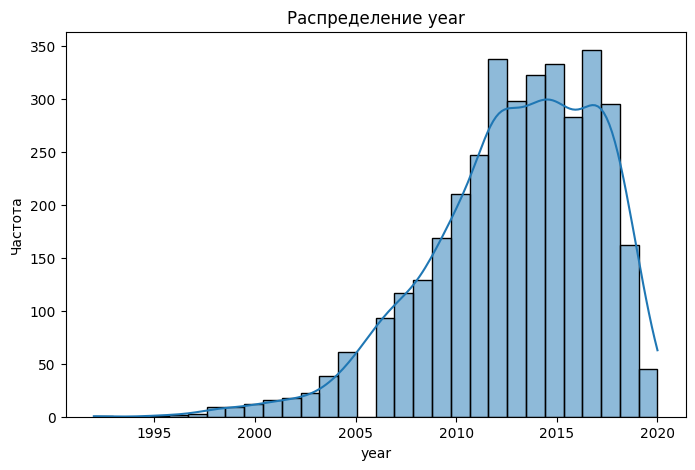

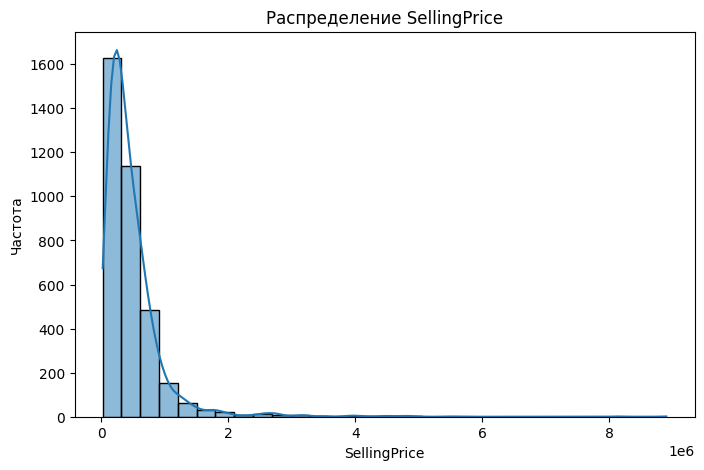

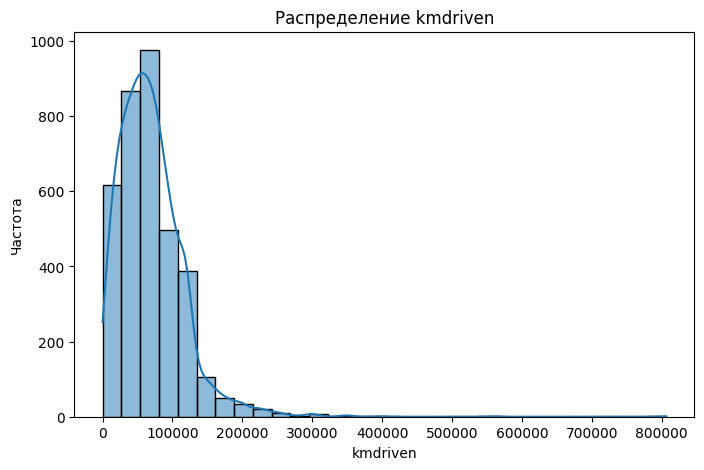

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=feature, kde=True, bins=30)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

Распределение 'year':
Гистограмма показывает, что большинство автомобилей в наборе данных выпущены после 2010 года, с пиком около 2015-2017 годов Распределение немного скошено влево.

Распределение 'SellingPrice':
Гистограмма 'SellingPrice' сильно скошена вправо, что указывает на наличие небольшого количества автомобилей с очень высокими ценами продажи, в то время как большинство автомобилей имеют более низкие цены.

Распределение 'kmdriven':
Гистограмма 'kmdriven' также скошена вправо, но в меньшей степени, чем 'SellingPrice'. Большинство автомобилей имеют пробег менее 100 000 км.

Выводы:
- Распределение 'year' указывает на преобладание более новых автомобилей в наборе данных.
- Распределения 'SellingPrice' и 'kmdriven' скошены вправо, что говорит о наличии выбросов с высокими ценами и большим пробегом соответственно.

,year,SellingPrice,kmdriven
year,1.000000,0.424266,-0.417558
SellingPrice,0.424266,1.000000,-0.187482
kmdriven,-0.417558,-0.187482,1.000000


,year,SellingPrice,kmdriven
year,18.068811,9.183377e+05,-8.443819e+04
SellingPrice,918337.684169,2.592982e+11,-4.541692e+09
kmdriven,-84438.190268,-4.541692e+09,2.263156e+09


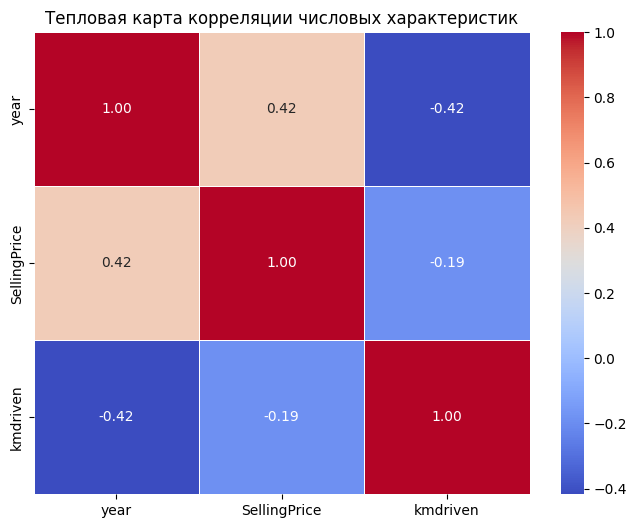

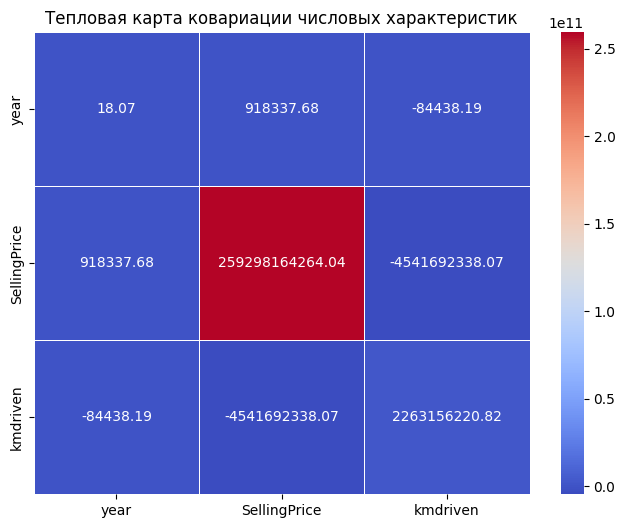

In [11]:
correlation_matrix = data[numerical_features].corr()
display(correlation_matrix)

covariance_matrix = data[numerical_features].cov()
display(covariance_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Тепловая карта корреляции числовых характеристик')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Тепловая карта ковариации числовых характеристик')
plt.show()

Корреляция:
- Значение, близкое к +1, указывает на сильную положительную линейную корреляцию.
- Значение, близкое к -1, указывает на сильную отрицательную линейную корреляцию.
- Значение, близкое к 0, указывает на отсутствие линейной корреляции.

Из тепловой карты корреляции и матрицы корреляции видно следующее:

- SellingPrice и Year: Коэффициент корреляции составляет примерно 0.41. Это указывает на умеренную положительную линейную зависимость между годом выпуска автомобиля и его ценой продажи.
- SellingPrice и kmdriven: Коэффициент корреляции составляет примерно -0.19. Это указывает на слабую отрицательную линейную зависимость между ценой продажи и пробегом. С увеличением пробега цена продажи имеет тенденцию немного снижаться.
- Year и kmdriven: Коэффициент корреляции составляет примерно -0.42. Это указывает на умеренную отрицательную линейную зависимость между годом выпуска и пробегом. Более старые автомобили, как правило, имеют больший пробег.

Ковариация:
Из матрицы ковариации видно следующее:
- Ковариация между SellingPrice и Year положительна (примерно 1.01e+06), что соответствует положительной корреляции и указывает на то, что с увеличением года выпуска цена продажи в среднем увеличивается.
- Ковариация между SellingPrice и kmdriven отрицательна (примерно -5.18e+09), что соответствует отрицательной корреляции и указывает на то, что с увеличением пробега цена продажи в среднем снижается.
- Ковариация между Year и kmdriven отрицательна (примерно -8.25e+04), что соответствует отрицательной корреляции и указывает на то, что более старые автомобили в среднем имеют больший пробег.

Выводы:
- Между SellingPrice и year существует умеренная положительная линейная зависимость.
- Между SellingPrice и kmdriven существует слабая отрицательная линейная зависимость.
- Между year и kmdriven существует умеренная отрицательная линейная зависимость.

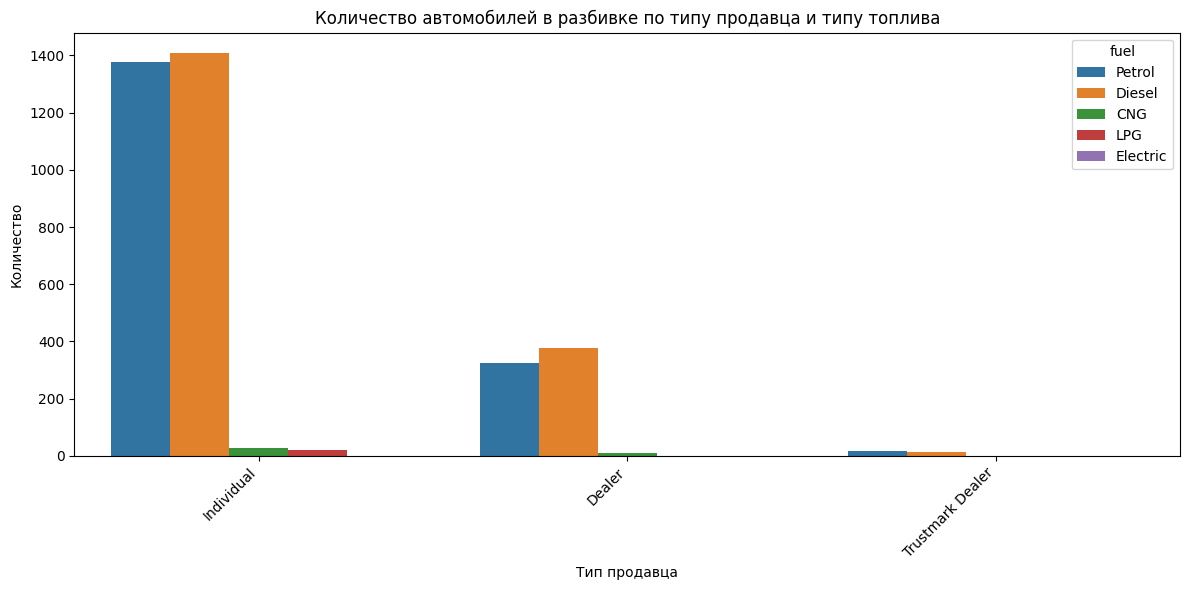

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='seller_Type', hue='fuel')
plt.title('Количество автомобилей в разбивке по типу продавца и типу топлива')
plt.xlabel('Тип продавца')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Эта столбчатая диаграмма показывает распределение автомобилей по типу продавца (seller_Type), разделенное по типу топлива (fuel).

 - Независимо от типа продавца, бензиновые автомобили составляют наибольшую долю в наборе данных.
 - Дизельные автомобили занимают второе место по популярности среди всех типов продавцов.
 - Газовые автомобили наименее распространены среди всех типов продавцов.
 - На диаграмме видно, что структура предлагаемых автомобилей по типу топлива различается в зависимости от типа продавца, что может быть важным фактором при анализе рынка или прогнозировании цен.

Максимальная цена продажи по типу владельца:


,SellingPrice
owner,
First Owner,8900000.0
Fourth & Above Owner,700000.0
Second Owner,4400000.0
Test Drive Car,1350000.0
Third Owner,2300000.0


<Figure size 800x500 with 0 Axes>

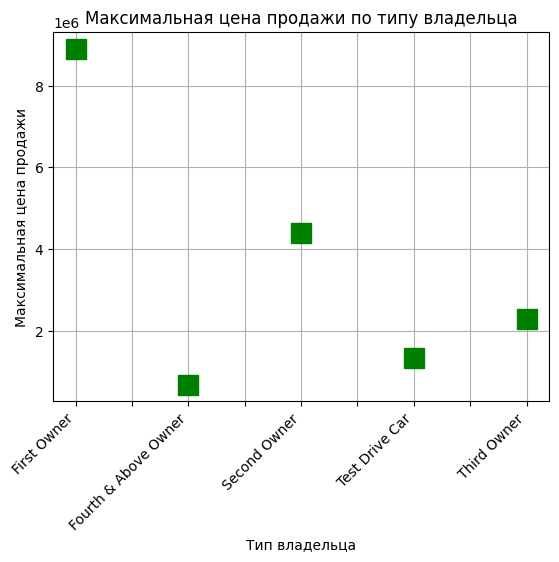

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

max_price_by_owner = data.pivot_table(values='SellingPrice', index='owner', aggfunc='max')
print("Максимальная цена продажи по типу владельца:")
display(max_price_by_owner)

plt.figure(figsize=(8, 5))
max_price_by_owner.plot(kind='line', marker='s', markersize=14, color='green', linestyle='', legend=False)
plt.title('Максимальная цена продажи по типу владельца')
plt.xlabel('Тип владельца')
plt.ylabel('Максимальная цена продажи')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Этот график показывает максимальную цену продажи (SellingPrice) для каждого типа владельца (owner).

 - Количество предыдущих владельцев оказывает существенное влияние на максимальную цену продажи автомобиля. Чем меньше владельцев, тем выше может быть максимальная цена.
 - Автомобили от первых владельцев имеют наибольший потенциал для высокой цены продажи.

Этот график демонстрирует, как история владения автомобилем связана с его максимальной рыночной стоимостью.

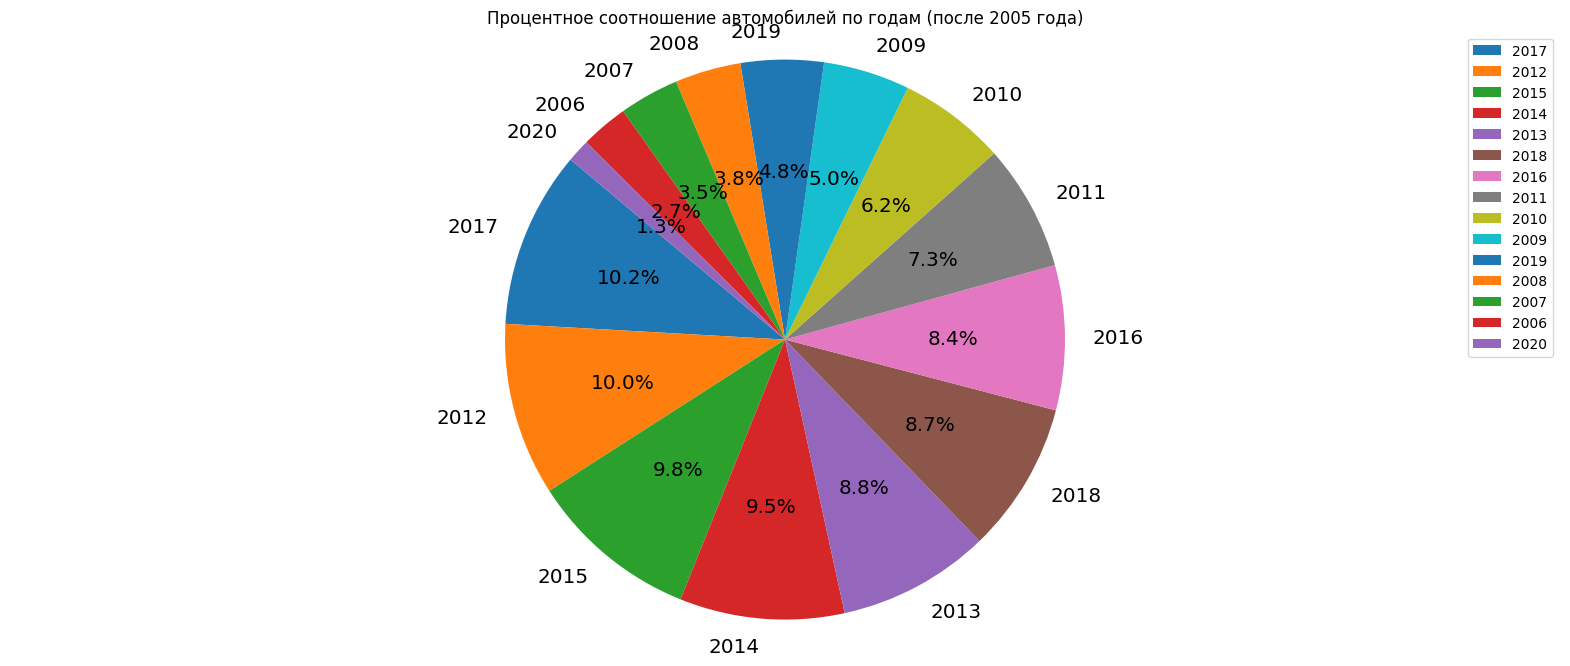

In [14]:
import matplotlib.pyplot as plt

filtered_data = data[data['year'] > 2005]

year_counts = filtered_data['year'].value_counts()

plt.figure(figsize=(20, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, textprops={'size': 'x-large'})
plt.title('Процентное соотношение автомобилей по годам (после 2005 года)')
plt.legend(fontsize=10, bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.show()

Эта круговая диаграмма показывает процентное распределение автомобилей по годам выпуска для данных, отфильтрованных так, чтобы включить только автомобили, выпущенные после 2005 года.

 - Набор данных преимущественно состоит из автомобилей, выпущенных в последнее десятилетие (с 2010 по 2019 годы).
 - Наибольшее количество предложений в наборе данных приходится на автомобили среднего возраста (от 3 до 7 лет на момент сбора данных).
 - Относительно небольшая доля автомобилей очень старых (до 2005 года, которые были отфильтрованы) и очень новых (2020 года).

Эта диаграмма дает хорошее представление о временном распределении автомобилей в отфильтрованном наборе данных.

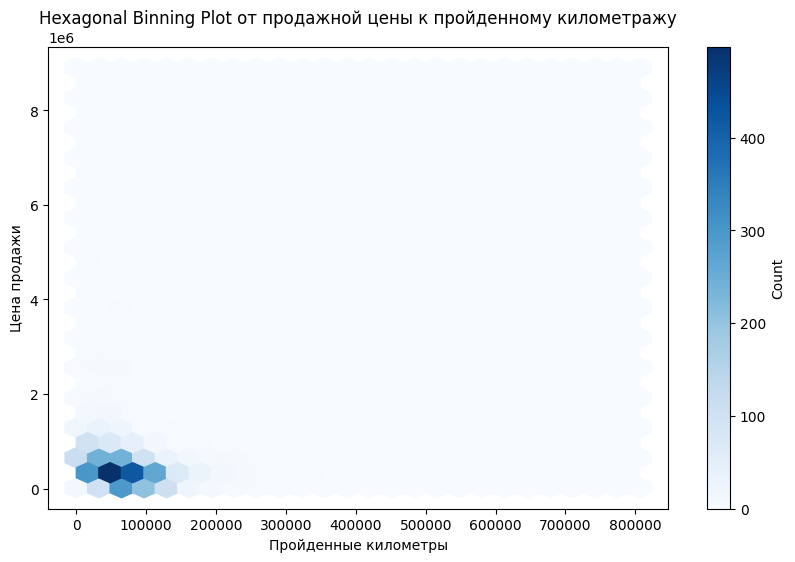

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.hexbin(data['kmdriven'], data['SellingPrice'], gridsize=25, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexagonal Binning Plot от продажной цены к пройденному километражу')
plt.xlabel('Пройденные километры')
plt.ylabel('Цена продажи')
plt.show()

Такой график типа hexagonal binning plot отображает распределение двух числовых признаков: kmdriven (пробег в километрах) и SellingPrice (цена продажи). Места с более высокой плотностью точек (больше автомобилей с определенным сочетанием пробега и цены) отображаются более темным цветом.

 - Большинство автомобилей в наборе данных имеют низкий или средний пробег и низкую или среднюю цену продажи.
 - Существует обратная зависимость между пробегом и ценой продажи: автомобили с большим пробегом, как правило, имеют более низкую цену, что отражается в уменьшении плотности в верхних правых областях графика.
 - Hexagonal binning plot эффективно показывает области с высокой и низкой плотностью данных, что помогает выявить основные тенденции в совместном распределении двух числовых признаков.

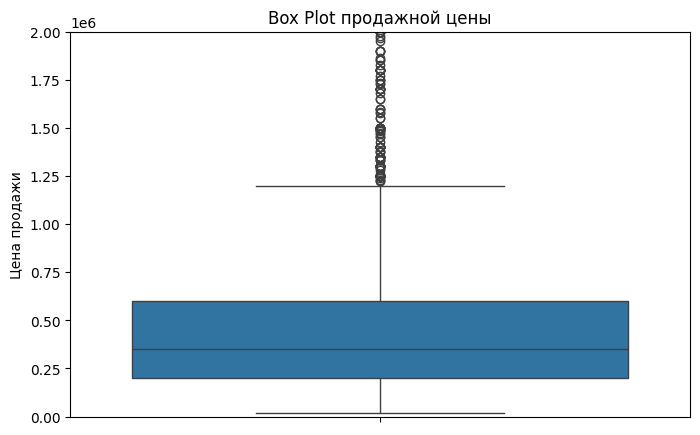

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='SellingPrice')
plt.title('Box Plot продажной цены')
plt.ylabel('Цена продажи')
plt.ylim(0, 2000000)
plt.show()

Box plot для SellingPrice показывает распределение цен продажи автомобилей в наборе данных.

 - Распределение SellingPrice сильно скошено вправо из-за наличия значительного количества выбросов с высокими значениями.
 - Большинство автомобилей в наборе данных имеют цены продажи в пределах IQR.
 - Наличие большого количества выбросов с высокими ценами указывает на необходимость внимательного рассмотрения этих данных при дальнейшем анализе или построении моделей, так как они могут существенно влиять на результаты.

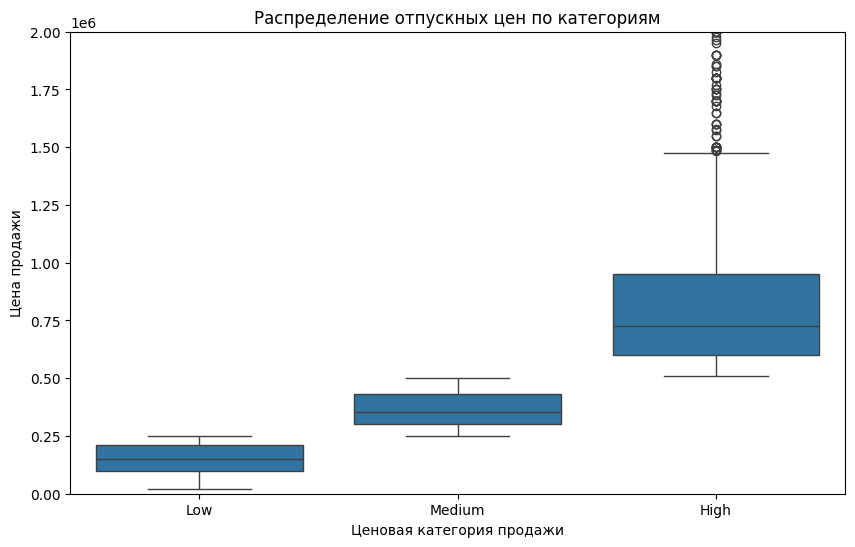

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

quantiles = data['SellingPrice'].quantile([0.33, 0.66]).to_list()

def categorize_price(price):
    if price <= quantiles[0]:
        return 'Low'
    elif price <= quantiles[1]:
        return 'Medium'
    else:
        return 'High'

data['SellingPrice_Category'] = data['SellingPrice'].apply(categorize_price)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='SellingPrice_Category', y='SellingPrice', order=['Low', 'Medium', 'High'])
plt.title('Распределение отпускных цен по категориям')
plt.xlabel('Ценовая категория продажи')
plt.ylabel('Цена продажи')
plt.ylim(0, 2000000)
plt.show()

Этот box plot показывает распределение цены продажи (SellingPrice) для каждой из созданных категорий ('Low', 'Medium', 'High'), основанных на квантилях признака SellingPrice.

 - Создание категорий на основе квантилей эффективно разделило признак SellingPrice на три группы с различными диапазонами цен.
 - Box plot наглядно демонстрирует распределение цен внутри каждой категории, подтверждая, что 'Low' содержит самые низкие цены, 'Medium' - средние, а 'High' - самые высокие.
 - В категории 'High' сосредоточены выбросы с экстремально высокими ценами, что согласуется с предыдущим анализом распределения 'SellingPrice'.


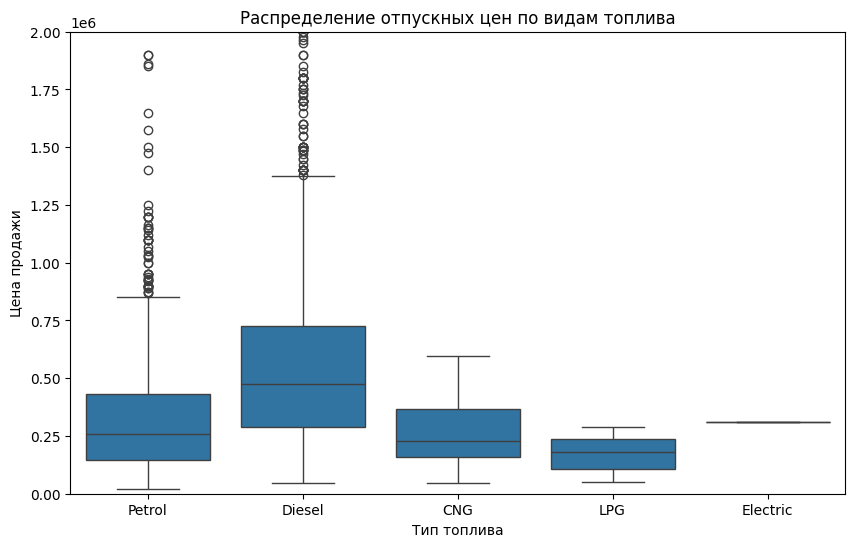

<Figure size 1000x600 with 0 Axes>

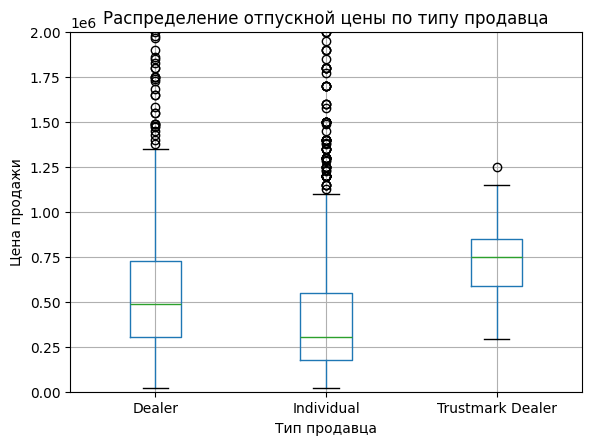

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fuel', y='SellingPrice')
plt.title('Распределение отпускных цен по видам топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Цена продажи')
plt.ylim(0, 2000000)
plt.show()

plt.figure(figsize=(10, 6))
data.boxplot(column='SellingPrice', by='seller_Type')
plt.title('Распределение отпускной цены по типу продавца')
plt.xlabel('Тип продавца')
plt.ylabel('Цена продажи')
plt.suptitle('')
plt.ylim(0, 2000000)
plt.show()

1. box plot показывает распределение цен продажи (`SellingPrice`) для каждого типа топлива (`fuel`).

2. box plot показывает распределение цен продажи (`SellingPrice`) для каждого типа продавца (`seller_Type`).

 - Тип топлива (`fuel`): Дизельные автомобили в среднем продаются по более высокой цене, чем бензиновые и газовые. Распределение цен для дизельных и бензиновых автомобилей имеет больше выбросов с высокими значениями.
 - Тип продавца (`seller_Type`): Автомобили, продаваемые дилерами, в среднем имеют более высокую цену продажи по сравнению с автомобилями, продаваемыми частными лицами. Оба типа продавцов имеют выбросы с высокими ценами.


В ходе выполнения данной лабораторной работы был проведен анализ данных набора данных, содержащего информацию о подержанных автомобилях. Основной целью являлось исследование характеристик данных, выявление взаимосвязей между признаками и получение предварительных выводов для последующего анализа или построения моделей.

Первоначальный осмотр данных после их загрузки выявил наличие пропущенных значений в признаках `SellingPrice`, `kmdriven` и `fuel`, а также явные дубликаты строк. Эти проблемы были устранены путем удаления строк с пропущенными значениями в ключевых признаках и удаления полных дубликатов. Дополнительно была проведена проверка на неявные дубликаты в категориальных признаках, и выявленные незначительные расхождения были унифицированы.

Визуальный анализ распределений числовых признаков с помощью гистограмм показал, что признаки `SellingPrice` и `kmdriven` имеют сильную скошенность вправо, что указывает на наличие выбросов с высокими значениями. Распределение года выпуска (`year`) показало преобладание более новых автомобилей в наборе данных. Box plots для `SellingPrice` подтвердили наличие выбросов и продемонстрировали, как цена продажи распределяется по различным категориям, таким как тип топлива и тип продавца. Было замечено, что дизельные автомобили и автомобили, продаваемые дилерами, в среднем имеют более высокие цены. Создание категорий на основе квантилей `SellingPrice` также позволило наглядно разделить данные по ценовым сегментам.

Исследование взаимосвязей между признаками с использованием матрицы диаграмм рассеяния, коэффициентов корреляции и ковариации показало умеренную положительную линейную зависимость между годом выпуска и ценой продажи (новые авто дороже), слабую отрицательную зависимость между пробегом и 